## Data exploration and cleaning
The first step here is to load all the required packages and the training dataset. Then, we have engaged in some initial exploratory analysis, in terms of studying the type of data columns, detecting and dropping null values (done so since there were few null values, that too present in string variable - if such null values would have been in numeric data columns we could have considered replacing them with mean values for instance), studying the varying distributions of data columns, and looking for general correlations and relationships within the dataset. 

In [1]:
#Import all the required modules 
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import all the packages needed for model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

import sklearn.metrics as sm
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import svm

In [2]:
#Read the csv file
spotify_df = pd.read_csv("CS98XRegressionTrain.csv")
spotify_df

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [360]:
#Checking for general information on the dataset, nature of each column, and presence of null values 
spotify_df.info()
spotify_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [361]:
#Dropping all null values from the dataset
#Note: Null values only found in the 'top genre' column
new_spotify = spotify_df.dropna()
new_spotify

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
5,6,Grenade,Bruno Mars,pop,2010,110,56,71,-7,12,23,223,15,6,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [362]:
#Restricting the dataset to only those columns that will ultimately be used for supervised learning 
spotify_drop = new_spotify.drop(columns=['Id','year','title', 'artist'])
spotify_drop

,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,adult standards,107,31,45,-8,13,28,150,75,3,44
2,adult standards,105,36,63,-9,13,67,245,11,3,77
3,adult standards,170,28,47,-16,13,33,232,25,3,67
4,glam rock,121,47,56,-8,15,40,193,45,3,63
5,pop,110,56,71,-7,12,23,223,15,6,74
...,...,...,...,...,...,...,...,...,...,...,...
448,adult standards,80,22,18,-17,10,16,214,92,4,45
449,brill building pop,148,81,53,-13,23,96,147,50,3,50
450,dance pop,168,55,73,-8,20,61,289,23,14,77
451,boy band,165,87,64,-5,6,88,191,5,8,62


In [363]:
spotify_drop['top genre'].value_counts()

adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
bow pop                1
australian rock        1
boogaloo               1
british comedy         1
alternative rock       1
Name: top genre, Length: 86, dtype: int64

## Transformations 

In [364]:
spotify_replace = spotify_drop.replace({'top genre': {"adult standards":"standard","deep adult standards":"standard","glam rock":"rock","country rock":"rock","celtic rock":"rock","australian rock":"rock",
"album rock":"rock","art rock":"rock","blues rock":"rock","dance rock":"rock","classic rock":"rock","modern rock":"rock","rock-and-roll":"rock","soft rock":"rock","classic rock":"rock","alternative rock":"rock","german alternative rock":"rock",
                                                    "brill building pop":"pop","canadian pop":"pop","dance pop":"pop","europop":"pop","barbadian pop":"pop","classic uk pop":"pop","britpop":"pop","art pop":"pop",
                                                    "belgian pop":"pop","italian pop":"pop","new wave pop":"pop","classic danish pop":"pop","bow pop":"pop","baroque pop":"pop","bubblegum pop":"pop","afropop":"pop",
                                                    "hip pop":"pop","atl hip hop":"hip hop","east coast hip hop":"hip hop","detroit hip hop":"hip hop","bronx hip hop":"hip hop","british blues":"british","british soul":"british","british invasion":"british",
                                                    "british folk":"british","british comedy":"british","british dance band":"british","boy band":"band","acoustic blues":"other","glam punk":"other","avant-garde jazz":"other","disco house":"disco","bebop":"other","blues":"other","australian talent show":"other","louisiana blues":"other","hi-nrg":"other","yodeling":"other",
                                                    "deep house":"other","chanson":"other","mellow gold":"other","bubble trance":"other","big room":"other","classic soul":"other","german dance":"other","brit funk":"other","neo mellow":"other",
                                                    "eurodance":"other","uk garage":"other","afrobeat":"other","r&b":"other","chicago rap":"other","drone folk":"other","permanent wave":"other","merseybeat":"other","g funk":"other","boogaloo":"other",
                                                    "alternative metal":"other","latin":"other","belgian dance":"other","glam metal":"other","canadian folk":"other","american folk revival":"other",
                                                    "classic girl group":"other","chicago soul":"other","bubblegum dance":"other","doo-wop":"other"}})
spotify_replace

,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,standard,107,31,45,-8,13,28,150,75,3,44
2,standard,105,36,63,-9,13,67,245,11,3,77
3,standard,170,28,47,-16,13,33,232,25,3,67
4,rock,121,47,56,-8,15,40,193,45,3,63
5,pop,110,56,71,-7,12,23,223,15,6,74
...,...,...,...,...,...,...,...,...,...,...,...
448,standard,80,22,18,-17,10,16,214,92,4,45
449,pop,148,81,53,-13,23,96,147,50,3,50
450,pop,168,55,73,-8,20,61,289,23,14,77
451,band,165,87,64,-5,6,88,191,5,8,62


In [365]:
spotify_replace1 = spotify_replace.rename(columns={'top genre':'genre'})
spotify_replace1.describe()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,118.326484,60.504566,59.780822,-8.787671,17.605023,59.625571,228.267123,32.191781,5.671233,61.557078
std,25.175735,22.089660,15.404757,3.591005,13.807492,24.480160,63.426812,29.279912,5.571392,12.759353
min,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,100.000000,44.000000,50.000000,-11.000000,9.000000,42.250000,184.500000,7.000000,3.000000,54.000000
50%,120.000000,64.000000,62.000000,-8.000000,13.000000,61.000000,224.000000,23.000000,4.000000,64.000000
75%,133.000000,78.000000,70.750000,-6.000000,23.000000,80.000000,264.000000,57.000000,6.000000,72.000000
max,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,99.000000,47.000000,84.000000


/Users/kevin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


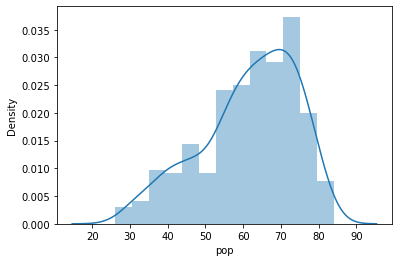

In [366]:
#Distribution of song popularity
sns_plot = sns.distplot(spotify_replace1["pop"])

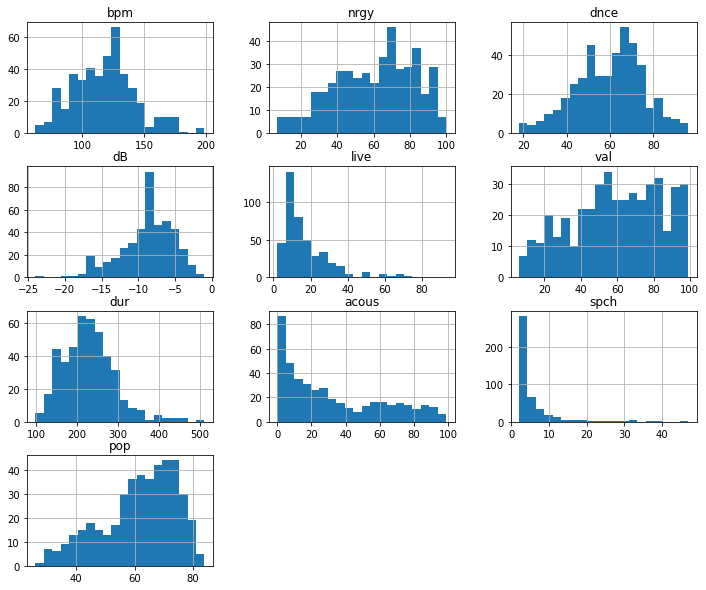

In [367]:
#Distribution of all numeric variables in the dataset 
spotify_replace1.hist(figsize=(12,10),bins=20)
plt.show()

We can see that broadly our data is non-normal, in that, we have a lot of outliers in columns such as dB, spch and live. However these outliers have not removed, since that would have greatly reduced out dataset which is already pretty small. Furthermore, low values of loudness (dB), high speechiness (spch), or higher liveness (live) does not indicate outliers that are not a representation of the real population dataset. Infact, it is quite possible that these outliers actually represent much of the real world, where there is varied music.
Another significant thing we notice is the negative values of dB, and relatively low standard deviation (3 approx). In order to extract more predictive power from this variable, we have thus converted into discrete variable though binning later on.

## Correlations and possible relationships

In [368]:
#Correlations between data columns, and wrt popularity 
corr_matrix = spotify_replace1.corr()
corr_matrix["pop"].sort_values(ascending=False)

pop      1.000000
dur      0.321028
dB       0.312952
nrgy     0.274006
dnce     0.256099
spch     0.130346
bpm      0.042695
live    -0.025493
val     -0.040035
acous   -0.443763
Name: pop, dtype: float64

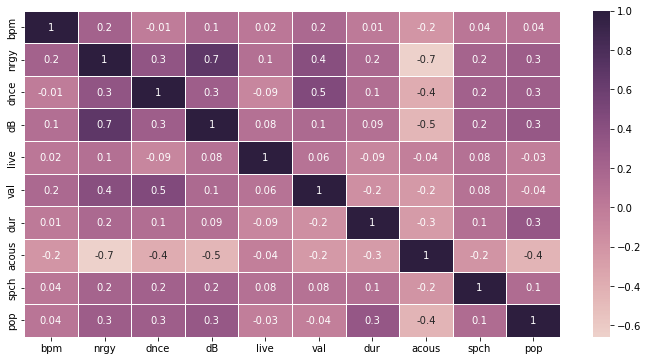

In [369]:
#Correlation Heatmap - to check for correlations within variables, and between explanatory and dependant variables
plt.figure(figsize = (12,6))
colms = ['pop', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 
                          'live', 'val', 'dur', 'acous', 
                          'spch']
sns.heatmap(corr_matrix, annot=True, linewidths = 1, fmt=".1g", cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

The correlation heatmap gives us a broad idea about the strength of relationships betweem popularity and other variables. It seems that bpm, val and live are strongly uncorrelated with popularity, and hence these have been dropped from the analysis.  
Further, in order to account for strong correlations between the explanatory variables, we saw that there is a correlation of 0.7 between dB and nrgy. This seems intuitive, since the louder a song, more energetic it would be. However, we decided not to drop either of them, as they both have decent correlations with popularity, and don't have a strong relationship between each other. Furthermore, moving forward we have converted db into a discrete variable. 

In [370]:
spotify_df1 = spotify_replace1.drop(columns=['bpm','val','live'])

## Binning
We realize that there is very little standard deviation in dB, with all its values being negative. Hence, we have binned this variable into binary values of 0 and 1. 

In [371]:
#Replace the values in the *db* column 
spotify_df1.loc[spotify_df1['dB'] > -10, 'dB'] = 0
spotify_df1.loc[spotify_df1['dB'] < -10 , 'dB'] = 1
spotify_df1.loc[spotify_df1['dB'] == -10 , 'dB'] = 1
print(spotify_df1)

        genre  nrgy  dnce  dB  dur  acous  spch  pop
0    standard    31    45   0  150     75     3   44
2    standard    36    63   0  245     11     3   77
3    standard    28    47   1  232     25     3   67
4        rock    47    56   0  193     45     3   63
5         pop    56    71   0  223     15     6   74
..        ...   ...   ...  ..  ...    ...   ...  ...
448  standard    22    18   1  214     92     4   45
449       pop    81    53   1  147     50     3   50
450       pop    55    73   0  289     23    14   77
451      band    87    64   0  191      5     8   62
452      rock    73    68   0  281     11     2   59

[438 rows x 8 columns]


## One hot encoding
In order to consider our genre variable, which is categorical, in our supervised learning model, we will have to encode it into a binary vector. Here, a mere ordinal encoding won't help, as that would mean putting in misleading inputs as each vategory is assigned a random integer, which in no way can quantify the category. But the regression model will mistake it for a numeric value. 
Through the process of one-hot encoding we avoid such an inexpressive input. After one-hot encoding each category of the genre variable will be a column in itself in our explanatory dataset, where all values of each column will be zero except in its index value. This will ensure that the categorical variable is well taken into the model. 

In [372]:
#Pandas approach to one hot encoding
features_to_onehot_encode = ["genre"]
for f in features_to_onehot_encode:
    spotify_df1 = pd.concat([spotify_df1, pd.get_dummies(spotify_df1[f], prefix=f)], axis=1)
    spotify_df1 = spotify_df1.drop(columns=[f])

spotify_df1.head(10)

,nrgy,dnce,dB,dur,acous,spch,pop,genre_band,genre_british,genre_country,genre_disco,genre_hip hop,genre_other,genre_pop,genre_rock,genre_standard
0,31,45,0,150,75,3,44,0,0,0,0,0,0,0,0,1
2,36,63,0,245,11,3,77,0,0,0,0,0,0,0,0,1
3,28,47,1,232,25,3,67,0,0,0,0,0,0,0,0,1
4,47,56,0,193,45,3,63,0,0,0,0,0,0,0,1,0
5,56,71,0,223,15,6,74,0,0,0,0,0,0,1,0,0
6,48,48,1,219,8,6,44,0,0,0,0,0,0,0,1,0
7,43,64,0,351,7,2,71,1,0,0,0,0,0,0,0,0
9,39,46,1,126,82,3,35,0,0,0,0,0,0,0,0,1
10,74,72,0,224,12,3,63,1,0,0,0,0,0,0,0,0
11,66,63,0,343,12,3,68,0,0,0,0,0,0,0,1,0


In [373]:
#Specifying the predicted and the explanatory variables in the training set 
X = spotify_df1.drop(columns=['pop'])
y = spotify_df1['pop']

In [374]:
#Splitting the data into train and test in a 7:3 ratio 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

## Regression analysis

In [375]:
regressor_test1=LinearRegression()
regressor_test2=svm.SVR(kernel="rbf", C=1, gamma="scale")
regressor_test3=RandomForestRegressor()


In [376]:
#Fitting testing data into all 3 models 
regressor_test1.fit(x_train, y_train)
regressor_test2.fit(x_train, y_train)
regressor_test3.fit(x_train, y_train)

RandomForestRegressor()

In [377]:
#Predicting the values of popularity in the validation data (from the training set)
predictions_test1=regressor_test1.predict(x_test)
predictions_test2=regressor_test2.predict(x_test)
predictions_test3=regressor_test3.predict(x_test)


In [378]:
#RMSE for Linear regression
r2_score(y_test,predictions_test1)
lin_mse1 = mean_squared_error(y_test, predictions_test1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

11.212372880167775

In [379]:
#RMSE for SVR
lin_mse2 = mean_squared_error(y_test, predictions_test2)
lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

11.823219488970373

In [380]:
#RMSE for Random forest
lin_mse3 = mean_squared_error(y_test, predictions_test3)
lin_rmse3 = np.sqrt(lin_mse3)
lin_rmse3

11.968834972797504

<BarContainer object of 15 artists>

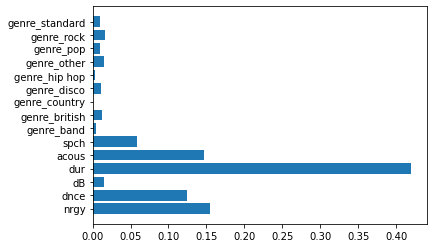

In [381]:
#Feature importances in Random Forest regression
attributes = list(x_train)
attributes=np.array(attributes)
plt.barh(attributes, regressor_test3.feature_importances_)

##  Whole training dataset

Now that we have checked the fit of our models, we train the whole training dataset (without splitting) to fit all 3 models, and then predict for test dataset. 

In [382]:
regressor1 = LinearRegression()
regressor2 = svm.SVR(kernel="linear", C=1, gamma="scale")
regressor3 = RandomForestRegressor()
regressor1.fit(X, y)
regressor2.fit(X, y)
regressor3.fit(X, y)

RandomForestRegressor()

In [383]:
spotify_df_test = pd.read_csv("CS98XRegressionTest.csv")
spotify_df_test

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,563,Candy Shop,50 Cent,east coast hip hop,2005,125,57,61,-8,38,76,209,3,47
110,564,Dragostea Din Tei - Italian Version,O-Zone,bubblegum dance,2010,130,89,67,-6,10,80,215,4,3
111,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27
112,566,YMCA - Original Version 1978,Village People,disco,1978,127,97,72,-5,12,73,287,6,14


In [384]:
spotify_test_drop = spotify_df_test.drop(columns=['Id','year','title'])
spotify_test_drop

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,The Black Eyed Peas,dance pop,154,93,65,-3,75,74,213,1,18
1,Elton John,glam rock,161,39,30,-15,11,14,292,26,3
2,Queen,glam rock,64,46,27,-7,12,18,179,38,3
3,Faithless,big beat,127,92,71,-9,37,53,216,6,4
4,John Hartford,appalachian folk,115,46,56,-12,21,34,153,18,3
...,...,...,...,...,...,...,...,...,...,...,...
109,50 Cent,east coast hip hop,125,57,61,-8,38,76,209,3,47
110,O-Zone,bubblegum dance,130,89,67,-6,10,80,215,4,3
111,The Notorious B.I.G.,east coast hip hop,84,58,78,-7,14,76,253,43,27
112,Village People,disco,127,97,72,-5,12,73,287,6,14


In [385]:
spotify_test_replace = spotify_test_drop.replace({'top genre': {"glam rock":"rock","album rock":"rock","art rock":"rock","blues rock":"rock","dance rock":"rock",
                                                           "classic rock":"rock","modern rock":"rock","dance pop":"pop","brill building pop":"pop","barbadian pop":"pop","classic country pop":"pop","europop":"pop","canadian pop":"pop",
                                                          "east coast hip hop":"hip hop","bronx hip hop":"hip hop","adult standards":"standard","deep adult standards":"standard","alternative country":"country",
                                                          "british invasion":"british","alternative metal":"other","appalachian folk":"other","beach music":"other",
                                                          "big beat":"other","big room":"other","boy band":"band","bubblegum dance":"other","cowboy western":"other",
                                                          "dirty south rap":"other","diva house":"other","eurodance":"other","g funk":"other","glam metal":"other","hollywood":"other",
                                                          "jazz fusion":"other","mellow gold":"other","native american":"other","neo mellow":"other"}})
spotify_test_replace

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,The Black Eyed Peas,pop,154,93,65,-3,75,74,213,1,18
1,Elton John,rock,161,39,30,-15,11,14,292,26,3
2,Queen,rock,64,46,27,-7,12,18,179,38,3
3,Faithless,other,127,92,71,-9,37,53,216,6,4
4,John Hartford,other,115,46,56,-12,21,34,153,18,3
...,...,...,...,...,...,...,...,...,...,...,...
109,50 Cent,hip hop,125,57,61,-8,38,76,209,3,47
110,O-Zone,other,130,89,67,-6,10,80,215,4,3
111,The Notorious B.I.G.,hip hop,84,58,78,-7,14,76,253,43,27
112,Village People,disco,127,97,72,-5,12,73,287,6,14


In [386]:
spotify_test1 = spotify_test_replace.rename(columns={'top genre':'genre'})
spotify_test1

,artist,genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,The Black Eyed Peas,pop,154,93,65,-3,75,74,213,1,18
1,Elton John,rock,161,39,30,-15,11,14,292,26,3
2,Queen,rock,64,46,27,-7,12,18,179,38,3
3,Faithless,other,127,92,71,-9,37,53,216,6,4
4,John Hartford,other,115,46,56,-12,21,34,153,18,3
...,...,...,...,...,...,...,...,...,...,...,...
109,50 Cent,hip hop,125,57,61,-8,38,76,209,3,47
110,O-Zone,other,130,89,67,-6,10,80,215,4,3
111,The Notorious B.I.G.,hip hop,84,58,78,-7,14,76,253,43,27
112,Village People,disco,127,97,72,-5,12,73,287,6,14


In [387]:
spotify_test_df1 = spotify_test1.drop(columns=['artist','bpm','val','live'])
spotify_test_df1

,genre,nrgy,dnce,dB,dur,acous,spch
0,pop,93,65,-3,213,1,18
1,rock,39,30,-15,292,26,3
2,rock,46,27,-7,179,38,3
3,other,92,71,-9,216,6,4
4,other,46,56,-12,153,18,3
...,...,...,...,...,...,...,...
109,hip hop,57,61,-8,209,3,47
110,other,89,67,-6,215,4,3
111,hip hop,58,78,-7,253,43,27
112,disco,97,72,-5,287,6,14


In [388]:
#Replace the values in the *db* column 
spotify_test_df1.loc[spotify_test_df1['dB'] > -10, 'dB'] = 0
spotify_test_df1.loc[spotify_test_df1['dB'] < -10 , 'dB'] = 1
spotify_test_df1.loc[spotify_test_df1['dB'] == -10 , 'dB'] = 1
print(spotify_test_df1)

       genre  nrgy  dnce  dB  dur  acous  spch
0        pop    93    65   0  213      1    18
1       rock    39    30   1  292     26     3
2       rock    46    27   0  179     38     3
3      other    92    71   0  216      6     4
4      other    46    56   1  153     18     3
..       ...   ...   ...  ..  ...    ...   ...
109  hip hop    57    61   0  209      3    47
110    other    89    67   0  215      4     3
111  hip hop    58    78   0  253     43    27
112    disco    97    72   0  287      6    14
113    other    89    53   0  249      8     3

[114 rows x 7 columns]


In [389]:
# Pandas approach to one hot encoding
features_to_onehot_encode = ["genre"]
for f in features_to_onehot_encode:
    spotify_test_df1 = pd.concat([spotify_test_df1, pd.get_dummies(spotify_test_df1[f], prefix=f)], axis=1)
    spotify_test_df1 = spotify_test_df1.drop(columns=[f])
spotify_test_df1.head(10)

,nrgy,dnce,dB,dur,acous,spch,genre_band,genre_british,genre_country,genre_disco,genre_hip hop,genre_other,genre_pop,genre_rock,genre_standard
0,93,65,0,213,1,18,0,0,0,0,0,0,1,0,0
1,39,30,1,292,26,3,0,0,0,0,0,0,0,1,0
2,46,27,0,179,38,3,0,0,0,0,0,0,0,1,0
3,92,71,0,216,6,4,0,0,0,0,0,1,0,0,0
4,46,56,1,153,18,3,0,0,0,0,0,1,0,0,0
5,68,69,1,255,8,3,0,0,0,0,0,0,1,0,0
6,46,31,0,213,42,3,0,0,0,0,0,0,0,0,1
7,44,55,1,112,82,4,0,0,0,0,0,0,0,0,1
8,50,58,0,206,20,3,0,0,0,0,0,1,0,0,0
9,91,57,0,208,6,13,0,0,0,0,0,0,0,1,0


In [390]:
X_test_dataset = spotify_test_df1.values

In [391]:
predicted1 = regressor1.predict(X_test_dataset)
predicted2 = regressor2.predict(X_test_dataset)
predicted3 = regressor3.predict(X_test_dataset)

In [392]:
spotify_df_test1=pd.DataFrame()
spotify_df_test2=pd.DataFrame()
spotify_df_test3=pd.DataFrame()

In [393]:
spotify_df_test1["Pop"] = pd.DataFrame(predicted1)

In [394]:
spotify_df_test2["Pop"] = pd.DataFrame(predicted2)

In [395]:
spotify_df_test3["Pop"] = pd.DataFrame(predicted3)

In [396]:
spotify_df_test1.to_csv("CS98XRegressionTest111_predicted1.csv")

In [397]:
spotify_df_test2.to_csv("CS98XRegressionTest111_predicted2.csv")

In [398]:
spotify_df_test3.to_csv("CS98XRegressionTest111_predicted3.csv")

## Discussion

One of the exercises that we conducted, but have omitted from this notebook is feature scaling of explanatory variables in both training and testing datasets. We found that though feature scaling made sense for this kind of data, its inclusion was somehow worsening our predicted results of the testing data. However, the performance of the algorithms were not affected when we split the training data into train and validation. One possible reason why feature scaling might be giving worse results in test is the presence of huge outliers. That is, while our feature scaling brings all variables onto the same scale by standardizing them (mean close to zero), in cases where there are very high or very low values, the shrinking of feature scaling must be disproportionate, and hence creating noise in our analysis. This must be causing hindrance to our testing predictions. 

Another exercise that we had explored was dropping genre variable altogether. This, we concede, would make matters in terms of automating the regression process, easier. However, it did not improve our predictions. 

## Conclusion 

To conclude, we think this model still needs some work to be its best. One of the limitations of a random forest regression method is, when the model is tasked with predicting for values much higher than those in the training dataset, random forest algorithm will not give a high value prediction. Infact, it would give a lower result (that is, take an average of the values it has already witnessed). This is a limitation of the model we chose, and perhaps that of the dataset as well. We believe there is still room for data manipulation in this dataset before solving for the regression problem. 
